In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

In [2]:
ChangepointData = collections.namedtuple('CData', 
    ['x', 'y', 'ytrue'])
    #['H', 'Hinv', 'x', 'y', 'ytest', 'ytrue', 'btrue', 'bspline_bases', 'bspline_beta', 'snr'])

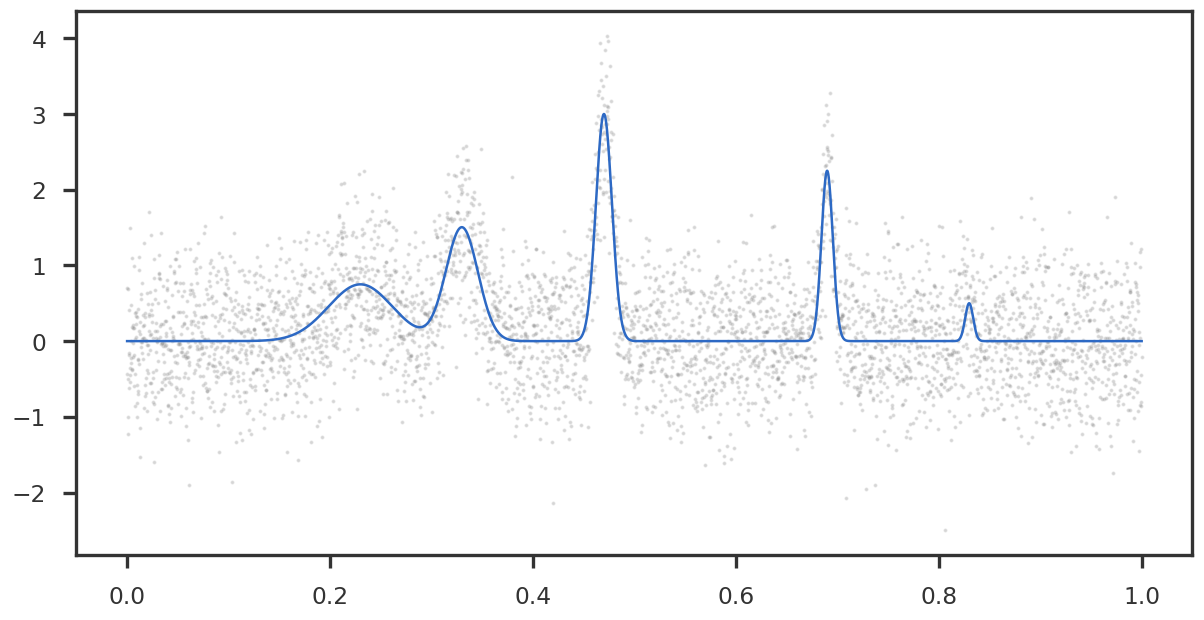

In [3]:
def spike_function(x):
    y = 0.75 * np.exp(-500 * np.square(x-0.23)) + \
         1.5 * np.exp(-2000 * np.square(x-0.33)) + \
           3 * np.exp(-8000 * np.square(x-0.47)) + \
        2.25 * np.exp(-16000 * np.square(x-0.69)) + \
         0.5 * np.exp(-32000 * np.square(x-0.83))
    return y

n = 4096
strue = 0.6

x = np.linspace(0, 1, n)
ytrue = spike_function(x)
noise = np.random.normal(0, strue, size = n)
y = ytrue + noise

data = ChangepointData(x = x, y = y, ytrue = ytrue)


fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(x, ytrue)
plt.show()

In [4]:
degree = 0

In [5]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)
#tf_bhat  = np.dot(data.Hinv, tf_y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



In [6]:
prior_init = toy_priors.get_ash(k = 20, sparsity = 0.9, skbase = 2.0, skfactor = 10.)
gv = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
gv.fit(data.y, 0, prior_init, y_init = tf_y)
print (f"GradVI terminated in {gv.niter} iterations.")

GradVI terminated in 852 iterations.


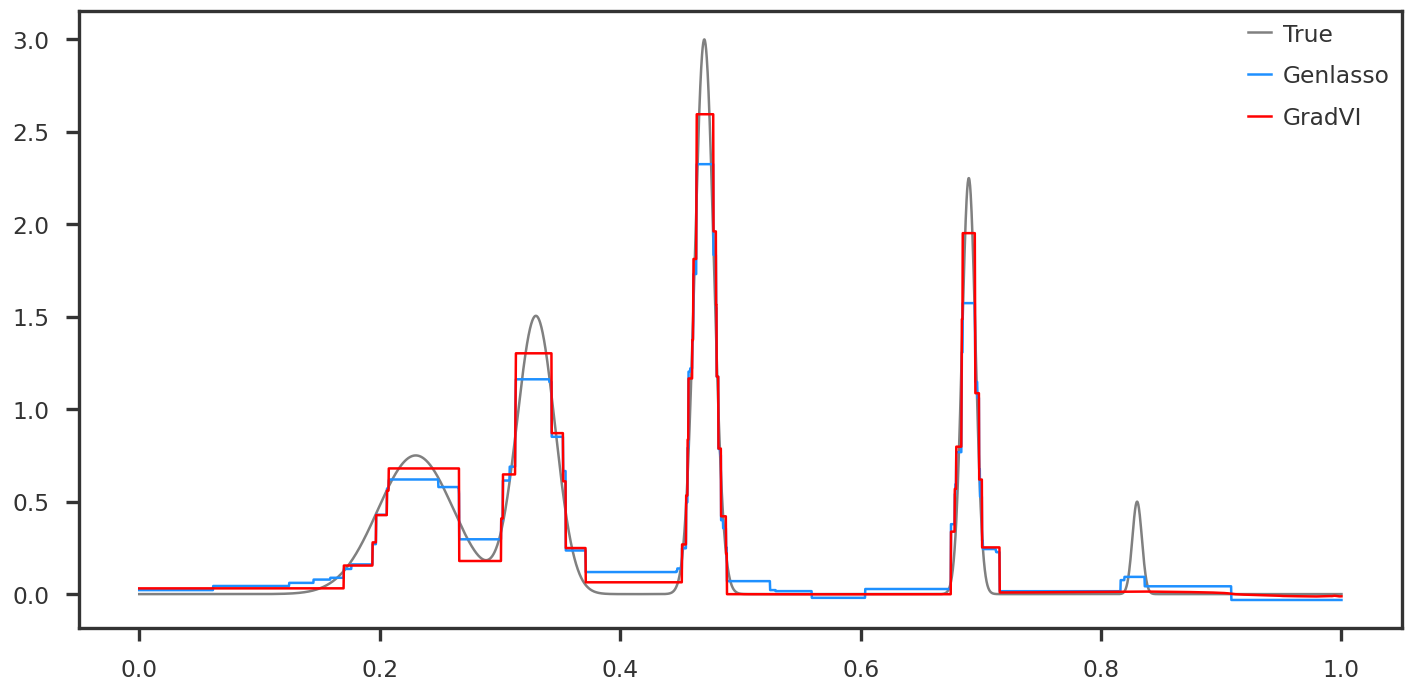

In [7]:
fig = plt.figure(figsize = (12, 6))
ax  = fig.add_subplot(1,1,1)
ax.plot(data.x, data.ytrue, label = 'True', color = 'grey')
#ax.scatter(data.x, data.y, s = 1, color = 'gray', alpha = 0.2)
ax.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
ax.plot(data.x, gv.ypred, label = 'GradVI', color = 'red')
ax.legend()

fig.tight_layout()
#fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()

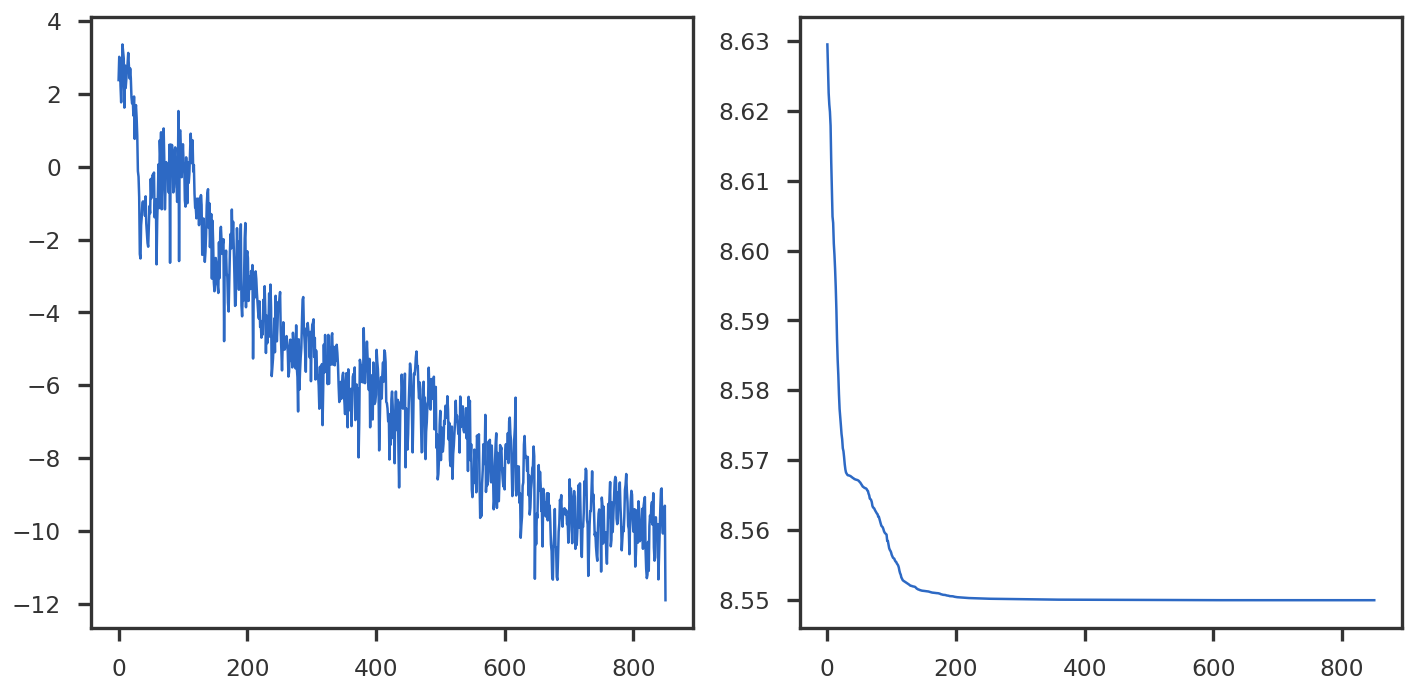

In [8]:
fig = plt.figure(figsize = (12, 6))

log_objdiff = np.log(-np.diff(gv.obj_path))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.arange(gv.niter - 1), log_objdiff)
ax2.plot(np.arange(gv.niter - 1), np.log(gv.elbo_path[1:]))

fig.tight_layout()
plt.show()

In [9]:
tf3_y, tf3_fit = R_trendfilter.fit(data.y, order = 3)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



In [10]:
prior_init = toy_priors.get_ash(k = 20, sparsity = 0.9, skbase = 2.0, skfactor = 30.)
gv1 = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
gv1.fit(data.y, 2, prior_init, y_init = gv.ypred)
print (f"GradVI terminated in {gv1.niter} iterations.")

GradVI terminated in 16245 iterations.


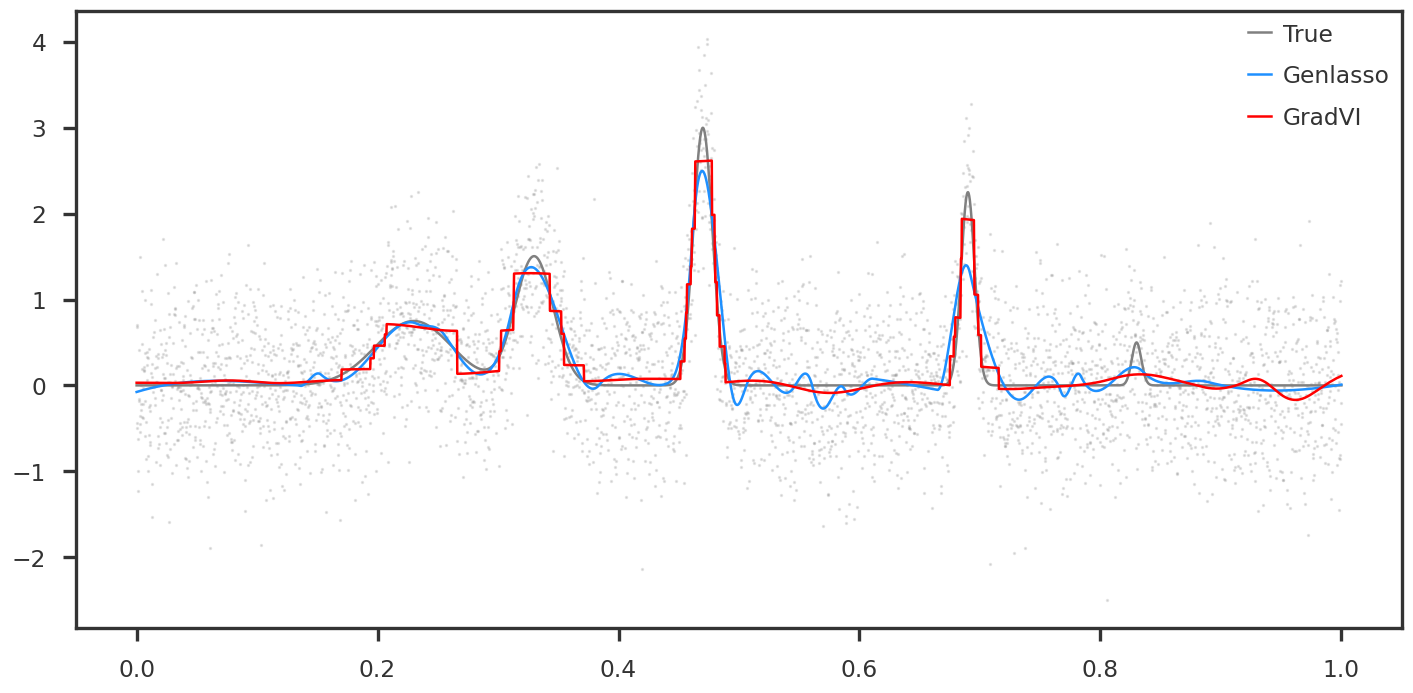

In [12]:
fig = plt.figure(figsize = (12, 6))
ax  = fig.add_subplot(1,1,1)
ax.plot(data.x, data.ytrue, label = 'True', color = 'grey')
ax.scatter(data.x, data.y, s = 1, color = 'gray', alpha = 0.2)
ax.plot(data.x, tf3_y, label = 'Genlasso', color = 'dodgerblue')
ax.plot(data.x, gv1.ypred, label = 'GradVI', color = 'red')
ax.legend()

fig.tight_layout()
#fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()